In [1]:
import os
import datascout as ds
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import glob 
import statistics

In [102]:
# Plotting parameters
params = {'legend.fontsize': 20,
          'figure.figsize': (16, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.ion()

plt.close('all')

In [103]:
path2files = './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/'
files_list = sorted(glob.glob(path2files+'*PM1*')) # we will always use "PM1" (in fact we will set the wirescanners such that PM1 will be the best).
# The feature of the “Best channel” from the wirescanner firmware does not work correctly yet (23Sep2021)

files2ignore_list = []

In [104]:
x_dict, y_dict = {}, {}

t_corr = 2*3600 # correction for acquisition time
my_variables = ['emittance_Set', 'profiles_Set', 'positions_Set', 'timestamp_Set']

for my_set in range(1,3):
    for variable in my_variables:
        x_dict[f'{variable}{my_set}'], y_dict[f'{variable}{my_set}'] = [], []
    
    for filename in files_list:
        if filename not in files2ignore_list:
            # Load data 
            data = ds.parquet_to_awkward(filename) # type: awkward.highlevel.Array
            #print(data.fields) # print the keys of the awkward array

            #acq = data['cycleStamp'][0]/1e9+ data[f'acq_time_Set{my_set}'][0]/1e6 # sec

            if '51637.H' in filename:
                x_dict[f'timestamp_Set{my_set}'].append(data['cycleStamp'][0]/1e9+ data[f'acq_time_Set{my_set}'][0]/1e6)  # Convert UNIX time to days since Matplotlib epoch.
                for variable in my_variables[:-1]:
                    x_dict[f'{variable}{my_set}'].append(data[f'{variable}{my_set}'][0][0])
                   
            if '41677.V' in filename:
                #y_dict[f'days_Set{my_set}'].append(md.epoch2num(acq+t_corr))  # Convert UNIX time to days since Matplotlib epoch.
                y_dict[f'timestamp_Set{my_set}'].append(data['cycleStamp'][0]/1e9+ data[f'acq_time_Set{my_set}'][0]/1e6)
                for variable in my_variables[:-1]:
                    y_dict[f'{variable}{my_set}'].append(data[f'{variable}{my_set}'][0][0])
        else:
            print(f'file {filename} ignored')

In [105]:
len(x_dict['days_Set1'])

KeyError: 'days_Set1'

In [106]:
import datetime
print(datetime.datetime.fromtimestamp(data['cycleStamp'][0]/1e9+ data[f'acq_time_Set{my_set}'][0]/1e6))#, timezone.utc))

2021-09-14 23:16:52.940500


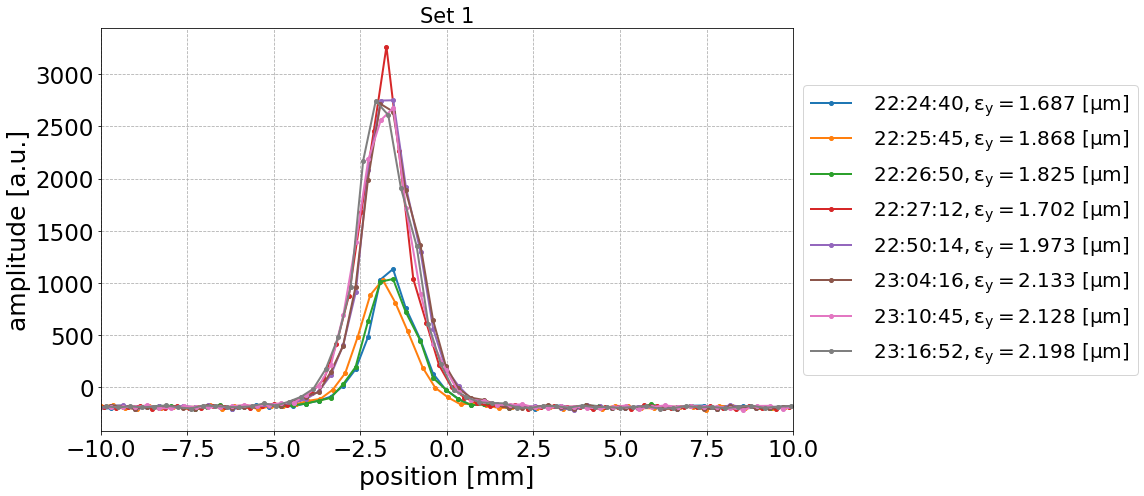

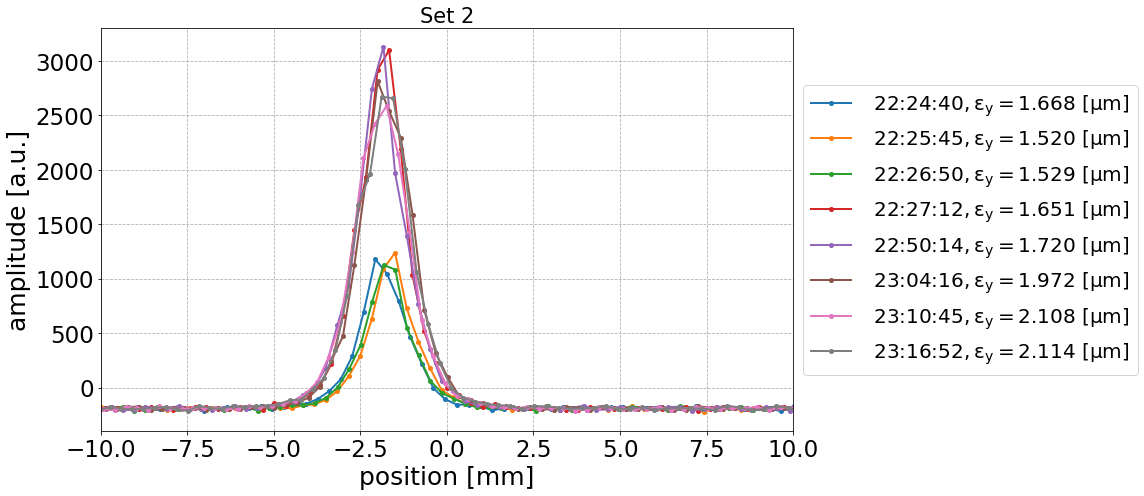

In [127]:
for my_set in range(1,3):
    fig, ax = plt.subplots()  
    for i in range(len(y_dict[f'timestamp_Set{my_set}'])):
        my_label_a = str(datetime.datetime.fromtimestamp(y_dict[f'timestamp_Set{my_set}'][i]))[10:19]
        my_label_b = y_dict[f'emittance_Set{my_set}'][i]*1e6
        #my_label = datetime.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S:%ms')
        ax.plot(y_dict[f'positions_Set{my_set}'][i], y_dict[f'profiles_Set{my_set}'][i], 'o-', ms=4, label=my_label_a+r'$, \mathrm{\epsilon_y=}$'+f'{my_label_b:.3f} '+r'$\mathrm{[\mu m}]$')

    ax.set_title(f'Set {my_set}')    
    ax.set_xlabel('position [mm]')
    ax.set_ylabel('amplitude [a.u.]')

    ax.set_xlim(-10, 10)
    #plt.legend(loc=1)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.grid(ls='--')
    plt.tight_layout()

    #plt.savefig(f'profilesY_vs_time_Set{my_set}.png', bbox_inches='tight')


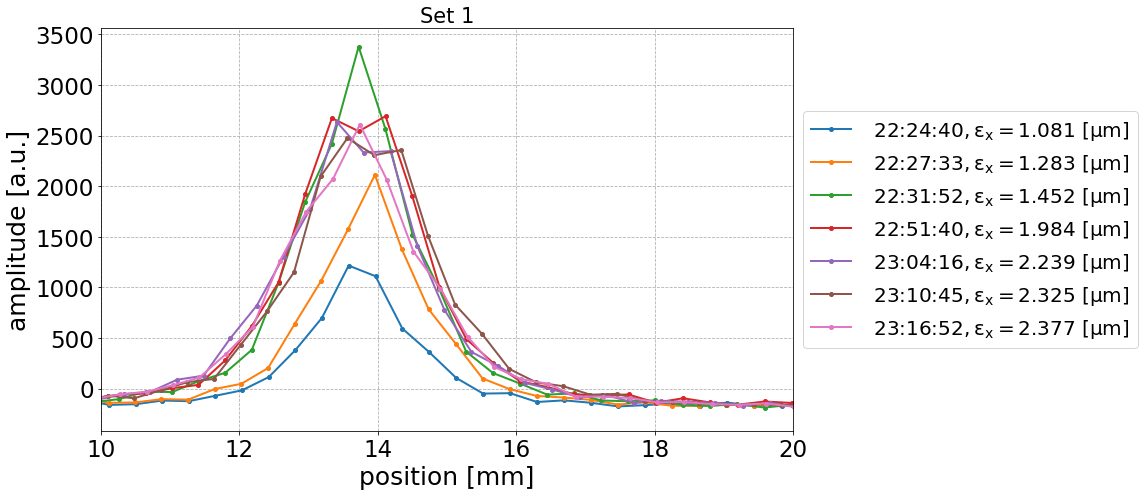

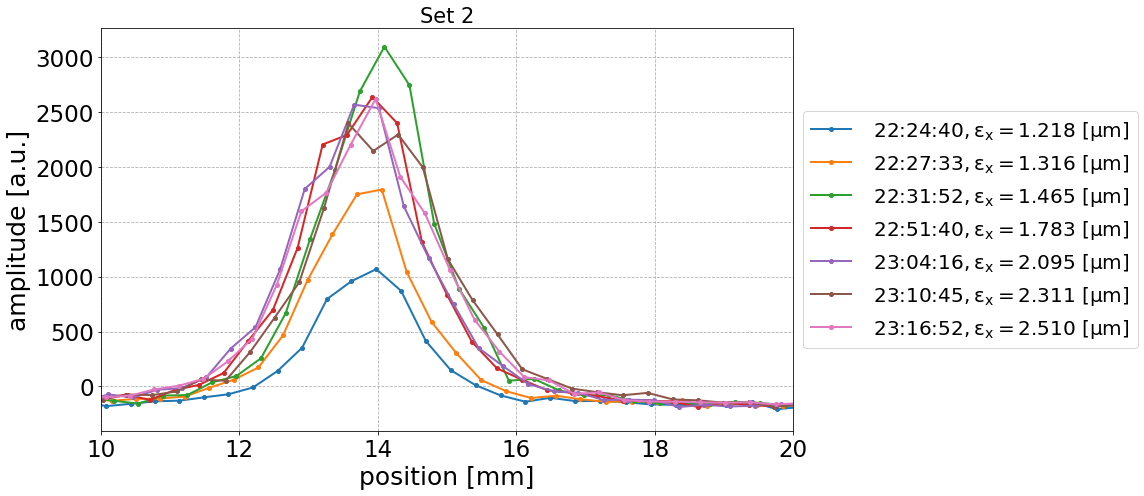

In [128]:
for my_set in range(1,3):
    fig, ax = plt.subplots()  
    for i in range(len(x_dict[f'timestamp_Set{my_set}'])):
        my_label_a = str(datetime.datetime.fromtimestamp(x_dict[f'timestamp_Set{my_set}'][i]))[10:19]
        my_label_b = x_dict[f'emittance_Set{my_set}'][i]*1e6
        #my_label = datetime.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S:%ms')
        ax.plot(x_dict[f'positions_Set{my_set}'][i], x_dict[f'profiles_Set{my_set}'][i], 'o-', ms=4, label=my_label_a+r'$, \mathrm{\epsilon_x=}$'+f'{my_label_b:.3f} '+r'$\mathrm{[\mu m}]$')

    ax.set_title(f'Set {my_set}')    
    ax.set_xlabel('position [mm]')
    ax.set_ylabel('amplitude [a.u.]')

    ax.set_xlim(10, 20)
    #plt.legend(loc=1)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.grid(ls='--')
    plt.tight_layout()

    #plt.savefig(f'profilesX_vs_time_Set{my_set}.png', bbox_inches='tight')
